# Training the segmented data

To reproduce the results from _, this notebook trains different models for the surface type classification. The cross-validation (cv=10) accuracy falls in a range of 78% - 81%. Therefore it is concluded that any of those model can provide sufficent image classification. The models that where evaluated are the following: 

- Random Forest 
- Multi Layer Percepton
- Histogram Gradient Boosting
- K-Neighbors 
- Support Vector

The analysis was run on a 13th Gen Intel® Core™ i7-1360P Chip on a machine with 32GB RAM. 

In [1]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score, cross_val_predict
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from helper import plot_confusion_matrix, print_classification_report

In [2]:
df_train = pd.read_csv('../training_segment.csv')[2:]

label_cols = [col for col in df_train.columns if 'label' in col]
cols_to_drop = label_cols + ['variable']

y = df_train['label.1']
X = df_train.drop(columns=cols_to_drop)

X.shape, y.shape

# We need to drop the labels that are Backroud (y=0) and 
# the labels that are not in the 3 classes we are interested in (y=3) 
# The y=3 class is a relict, as initally 4 classes where intended
mask = (y != 0) & (y != 3)

X = X[mask]
y = y[mask]


/tmp/ipykernel_56258/3074067008.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../training_segment.csv')[2:]


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    9.9s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   13.1s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   16.3s
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:   19.5s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:   23.1s
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:   28.0s
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:   31.3s
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:   35.1s
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:   35.1s
Label                Precision            Recall               F1-score            
1.0                  0.8581982578013011   0.8473598258029396   0.852744603922428   
--------------------------------------------------------------------------------
2.0                  0.679874487528916    0.6319240430876655   0.655022894025486

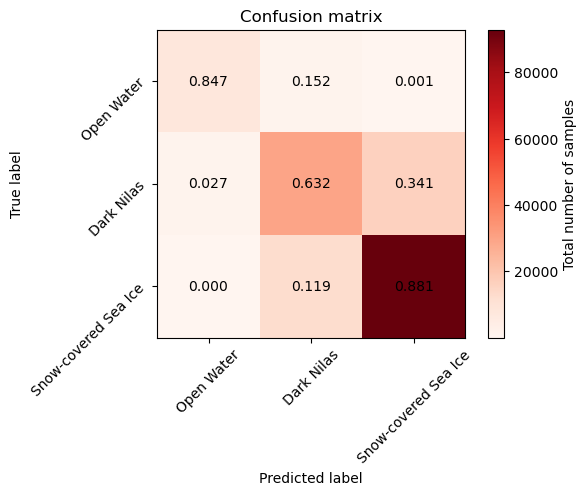

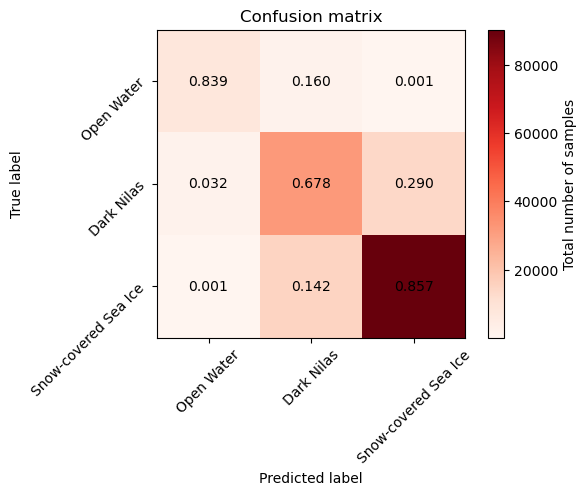

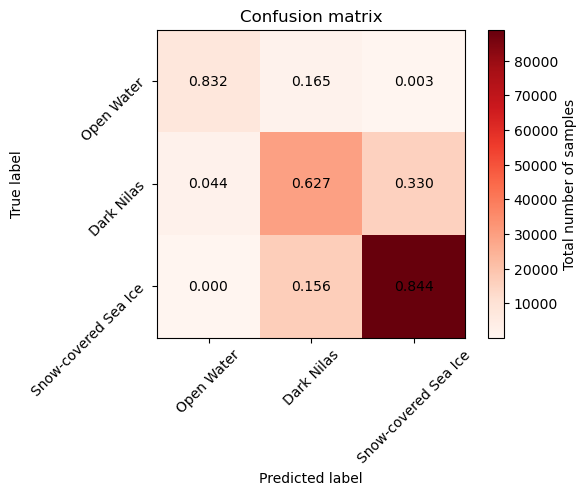

In [3]:
model_rfc = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    n_jobs=8,
    random_state=42,      
)

model_mlp = MLPClassifier(
    hidden_layer_sizes=100,
    max_iter=1000,
    random_state=42,
    solver='sgd'
)

model_hist = HistGradientBoostingClassifier(
    max_iter=1000,
    random_state=42
)

model_knn = KNeighborsClassifier(
    n_neighbors=3,
    n_jobs=8
)

model_svc = SVC(
    kernel='rbf',
    random_state=42
)

for model in [model_rfc, model_hist, model_knn]:
    y_pred = cross_val_predict(model, X, y, cv=10, verbose=100)

    accuracy = accuracy_score(y, y_pred)
    class_report = classification_report(y, y_pred, output_dict=True)
    conf_mat = confusion_matrix(y, y_pred)

    plot_confusion_matrix(conf_mat)
    print_classification_report(class_report)